In [4]:
import geopandas
import networkx as nx
from shapely.geometry import Point, LineString
from shapely.wkt import loads
import utils

graph = utils.read_graph_dot()
solution = utils.read_solution_path_txt()
gdf = geopandas.read_file("../data/highway_michelstadt.geojson")[["osm_id", "highway", "geometry"]]

,osm_id,highway,geometry
0,5219232,primary,"LINESTRING (8.99910 49.67114, 8.99927 49.67113..."
1,5219233,primary,"LINESTRING (8.99910 49.67114, 8.99908 49.67149)"
2,6133443,primary,"LINESTRING (9.00165 49.68314, 9.00148 49.68328..."
3,24540035,unclassified,"LINESTRING (9.00359 49.67200, 9.00433 49.67197..."
4,24540036,service,"LINESTRING (8.98924 49.67777, 8.98881 49.67793..."


In [24]:
temp = solution.loc[solution.geometry.geometry.type=='Point']
temp.total_bounds

array([ 8.92502471, 49.67      ,  9.07      , 49.71954625])

In [13]:
with open('../data/graph.dot', 'r') as dotFile:
    G = nx.drawing.nx_agraph.read_dot(dotFile)
number_of_components = len(list(nx.connected_components(G)))
print("Number of components: ", number_of_components)

Number of components:  1


<AxesSubplot: >

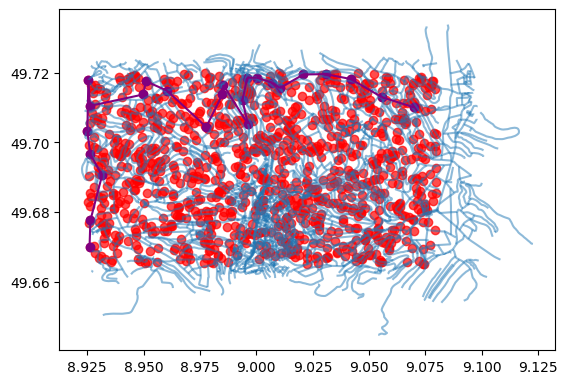

In [2]:
ax = gdf.plot(alpha=0.5)
graph.plot(ax=ax, color="red", alpha=.7)
solution.plot(ax=ax, color="purple")

# Past Results
## 1000 Nodes
Time elapsed in expensive_function() is: 2390.235364683s
Graph contains 1000 nodes
Graph contains 499499 edges
Write successfull.
Solution cost -335- with 24 nodes

# Ideas for Analyze
- Number of components in the graph
- Largest distance or circle (aka empty space) between nodes
- Density of nodes per area